In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [13]:
image_train = cv.imread('train.jpg')
image_query = cv.imread('query.jpg')
image_train_gray = cv.cvtColor(image_train, cv.COLOR_BGR2GRAY)
image_query_gray = cv.cvtColor(image_query, cv.COLOR_BGR2GRAY)

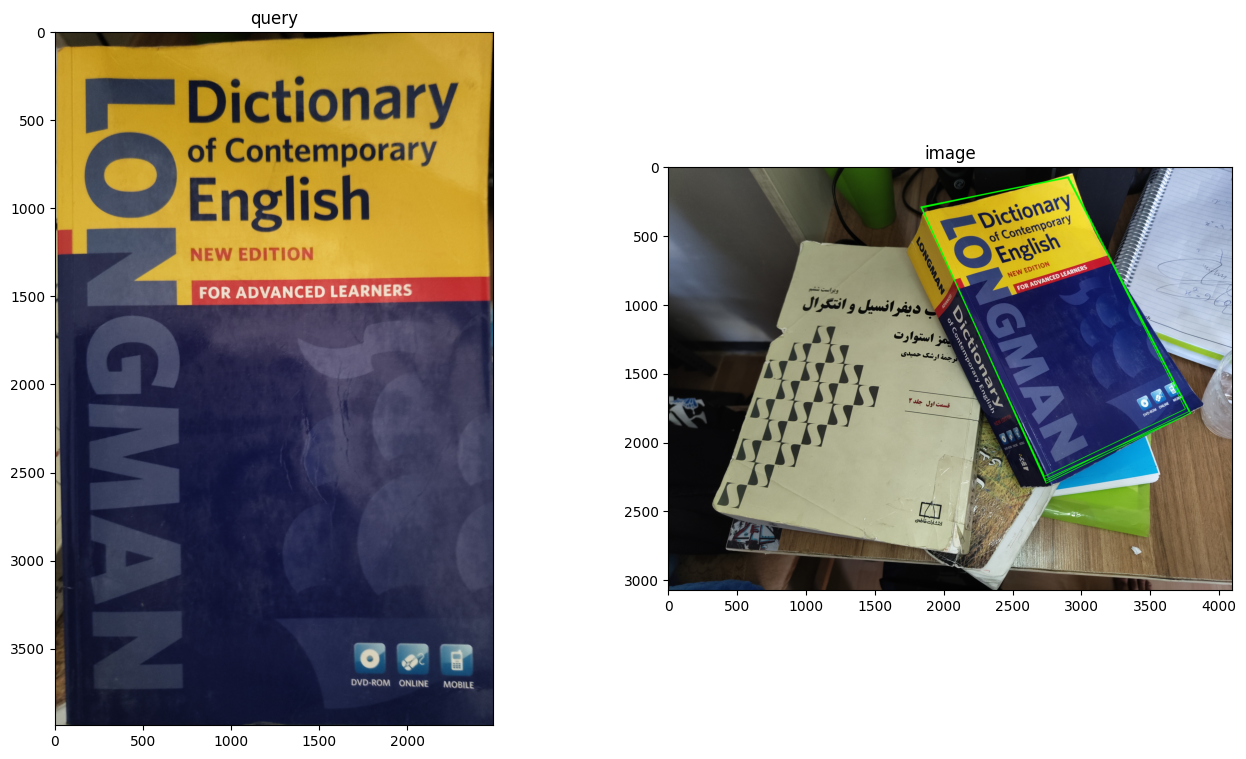

In [18]:
sift  = cv.SIFT_create()


k_train, d_train = sift.detectAndCompute(image_train_gray, None)
k_query, d_query = sift.detectAndCompute(image_query_gray, None)

FIK = 1
index = dict(algorithm=FIK, trees = 5)
search = dict(checks=50)

flann = cv.FlannBasedMatcher(index, search)
math = flann.knnMatch(d_query, d_train, k=2)

good = []
for m, n in math:
    if m.distance < 0.7 * n.distance:
        good.append(m)

MMC = 10

if len(good) > MMC:
    src_pts = np.float32([ k_query[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ k_train[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = image_query_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    result = cv.polylines(image_train,[np.int32(dst)],True,(0,255,0),3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    


plt.figure(figsize=(16, 9))
plt.subplot(121)
plt.title('query')
plt.imshow(image_query[...,::-1])
plt.subplot(122)
plt.title('image')
plt.imshow(image_train[...,::-1])        